In [31]:
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
#To plot the graph embedded in the notebook
%matplotlib inline

Loading Dataset "healthcare-dataset-stroke-data.csv"

In [32]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#checking unique values for catetorical attributes
print("Unique values of attributes:\n")
print("gender",df['gender'].unique())
print("ever_married ",df['ever_married'].unique())
print("work_type ",df['work_type'].unique())
print("Residence_type ",df['Residence_type'].unique())
print("smoking_status ",df['smoking_status'].unique())
print("stroke",df['stroke'].unique())
df.groupby('stroke').size()

Unique values of attributes:

gender ['Male' 'Female' 'Other']
ever_married  ['Yes' 'No']
work_type  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  ['Urban' 'Rural']
smoking_status  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


stroke
0    4861
1     249
dtype: int64

Data Preprocessing

In [33]:
#removing id attribute as it doesn't have impact on Dataset
#run only one time (while gives error run first loaded file then run one by one)

df.drop('id',axis=1,inplace=True)

In [34]:
df.drop_duplicates(inplace = True) #drop a row if there are duplicate instances (no duplicate)
df.dropna(inplace=True) #removing instances that has null value (in 'bmi' 100 instances was NAN)

In [35]:
#removing one row that has Other gender
for i in df.index:
    if df.loc[i,'gender']=='Other':
        df.drop(i,inplace=True)

In [7]:
#converting gender value from categorical to continuous
#df_dc = pd.get_dummies(df, columns=['gender']) 

for i in df.index:
    if df.loc[i,'gender']=='Male':
        df.loc[i,'gender']=1
    if df.loc[i,'gender']=='Female':
        df.loc[i,'gender']=0
#df['gender']

In [36]:
#removing row that has "smoking_status" -> 'Unknown' 
for i in df.index:
    if df.loc[i,'smoking_status']=='Unknown':
        df.drop(i,inplace=True)

In [9]:
#updated dataFrame
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,0,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Analysis based on ploting

In [10]:
sns.set_style('darkgrid')

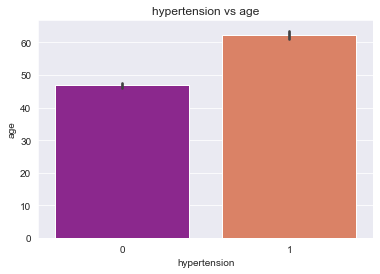

In [11]:
sns.barplot(x="hypertension", y="age", data=df,
 palette="plasma")

plt.title("hypertension vs age");

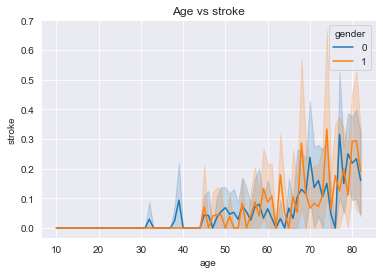

In [12]:
#age vs stroke
sns.lineplot(x="age", y="stroke",hue='gender' ,data=df)

"""plt.xlim=(1,90)
plt.ylim=(0,1)"""
# Setting title of the plot
plt.title("Age vs stroke");

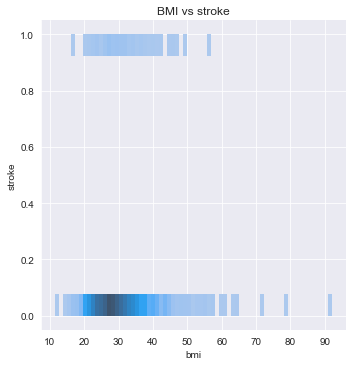

In [13]:
#bmi vs stroke
sns.displot(x="bmi", y="stroke",data=df)

# Setting title of the plot
plt.title("BMI vs stroke");

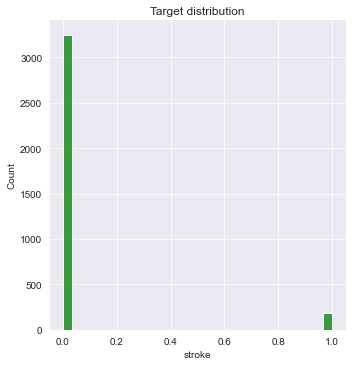

In [14]:
sns.displot(df['stroke'], bins=30, color='green')
plt.title("Target distribution");

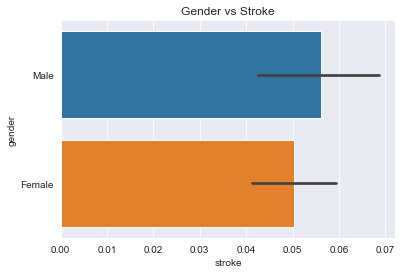

In [42]:
sns.barplot(y=df['gender'], x=df['stroke'])
plt.title("Gender vs Stroke");

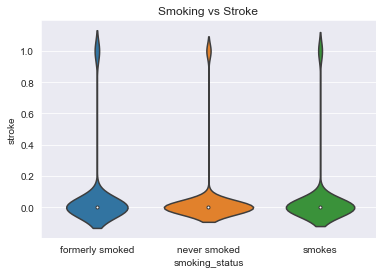

In [15]:
sns.violinplot(x="smoking_status",y="stroke",data=df)
plt.title("Smoking vs Stroke");

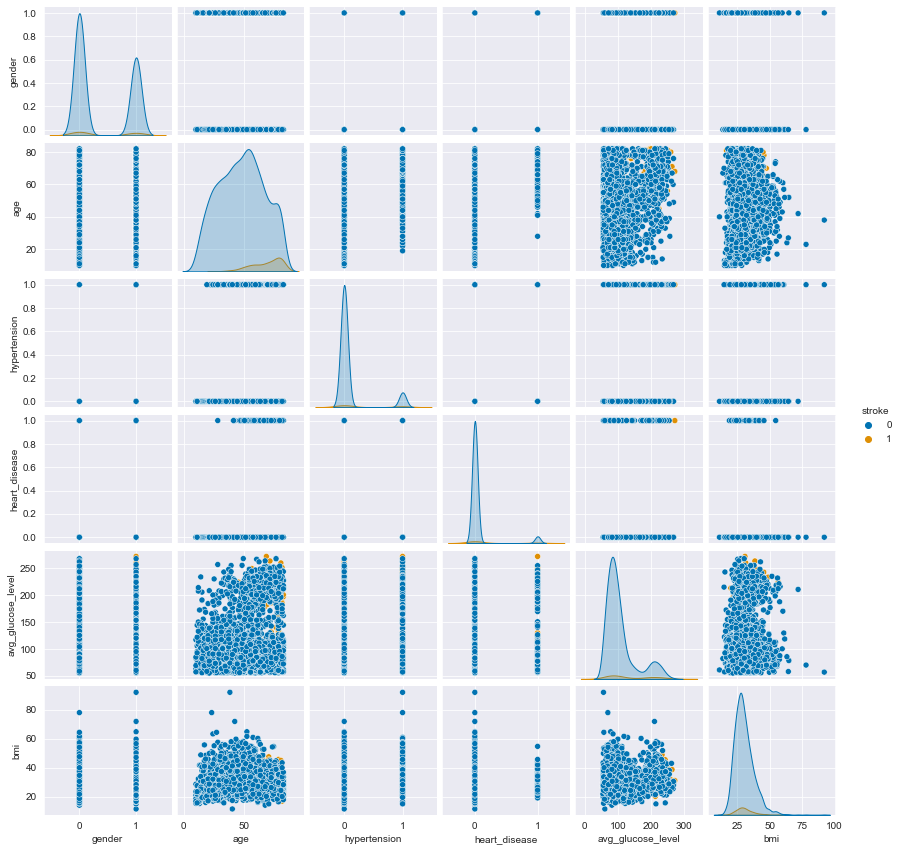

In [16]:
sns.pairplot(df, hue="stroke", height = 2, palette = 'colorblind');

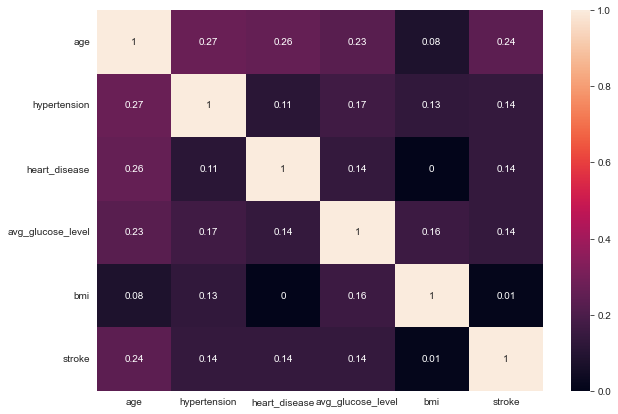

In [17]:
# corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# changing the figure size
plt.figure(figsize = (10, 7))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

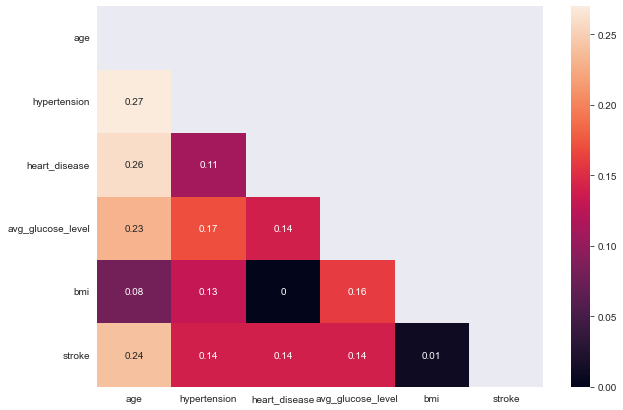

In [18]:

# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (10, 7))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

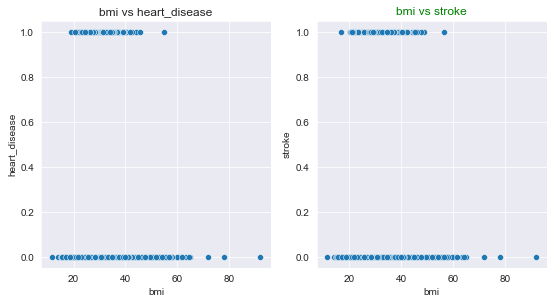

In [19]:
# Let's create plots to see the relationships
# between feature variables and target varable
plt.figure(figsize=(14,10))

# Relatiosnship in bmi vs heart_disease
plt.subplot(2, 3, 1)
sns.scatterplot(x=df['bmi'], y=df['heart_disease'])
plt.title("bmi vs heart_disease");

# Relatiosnship in bmi vs stroke
plt.subplot(2, 3, 2)
sns.scatterplot(x=df['bmi'], y=df['stroke'])
plt.title("bmi vs stroke", color='green');

Model Development

In [20]:
#feature matrix
X=df[['age','hypertension','heart_disease',"avg_glucose_level","bmi","gender"]]

In [21]:
#changing "stroke" value into categorical format
df['stroke'] = df['stroke'].replace([0, 1], ['No', 'Yes'])

In [22]:
#target Variable
y=df['stroke']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print("Feature train shape: ", X_train.shape)
print("Feature test shape: ", X_test.shape)
print("Target train shape: ", y_train.shape)
print("Target test shape: ", y_test.shape)

Feature train shape:  (2397, 6)
Feature test shape:  (1028, 6)
Target train shape:  (2397,)
Target test shape:  (1028,)


#SVM

In [24]:
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm

model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset

y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")

# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9436
----------------------------------


#DecisionTreeClassifier

In [25]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.8959
---------------------------------


#KNN

In [26]:
 # importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.928
----------------------------------


#LogisticRegression

In [27]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.9436
---------------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Naive Bayes

In [28]:
 # importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.8969
---------------------------------


Discussion (comparison among classification)

In [29]:
print("The accuracy scores of different Models:")
print("----------------------------------------")

for s in score:
 print(s)

The accuracy scores of different Models:
----------------------------------------
('NB', 0.8969)
('SVM', 0.9436)
('LR', 0.9436)
('DT', 0.8959)
('KNN', 0.928)
